## Implementation 

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## Data Preparation

In [45]:
X,y=make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

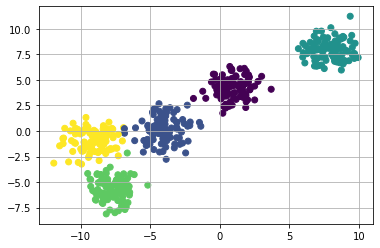

In [46]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.grid(True)
plt.show()

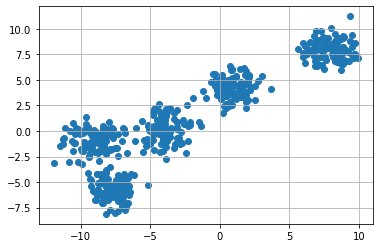

In [47]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
plt.show()

### Unsupervised Learning Algorithm ->K means Clustering

In [48]:
k=5
color=["green","red", "blue","yellow","orange"]
clusters={}

for i in range(k):
    center =10*(2*np.random.random((X.shape[1],))-1)
    points=[]
    
    cluster={
        'center':center,
        'points':points,
        'color':color[i]
    }
    
    clusters[i]=cluster
    

In [49]:
clusters

{0: {'center': array([ 4.43286998, -3.92313952]),
  'points': [],
  'color': 'green'},
 1: {'center': array([ 0.52415906, -1.32304372]),
  'points': [],
  'color': 'red'},
 2: {'center': array([-8.38427505,  9.07231706]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([-8.89106187,  0.65097058]),
  'points': [],
  'color': 'yellow'},
 4: {'center': array([-8.65938134,  8.35354425]),
  'points': [],
  'color': 'orange'}}

In [50]:
 #center =10*(2*np.random.random((X.shape[1],))-1)
 #print(center)


* Note-> np.random,random((x,y))  
* It generates a tuple of size(x,y) with values between [0.0,1.0)

In [51]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [52]:
#v1=np.array([1,2])
#v2=np.array([3,5])
#distance(v1,v2)

* E step  ->Assign every data point to one of the clusters
* M step  ->Updating every cluster center according to the mean of points in it

In [53]:
#Assign every data point to one of the clusters
def assignPointstoClusters(clusters):  #E-step
    for ix in range(X.shape[0]):   
        dist=[]
        curr_x=X[ix]
        
        for kx in range(k):
            d=distance(curr_x,clusters[kx]['center'])
            dist.append(d)
        
    current_cluster=np.argmin(dist)
    clusters[current_cluster]['points'].append(curr_x)
    

def updateClusters(clusters):  #M-step
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0: #If the cluster has some non-zero points
            new_u=pts.mean(axis=0)   #when axis=0, mean is taken column wise
            clusters[kx]['center']= new_u
            clusters[kx]['points']=[]  #Clear the list
        

def plotClusters(clusters):
    
    for kx in range(k):
        #print(len(clusters[kx]['points']))
        # convert it from list to np.array()
        
        pts=np.array(clusters[kx]['points'])
        print(pts.shape)
        
        #Plot the points
        try:
            plt.scatter(pts[:,0],pts[:,1]) #,color=clusters[kx]['color'])
        except:
            pass
        
        #Plot the cluster center
        uk=clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color='black',marker="*")    
    
    
    

(0,)
(0,)
(0,)
(0,)
(0,)


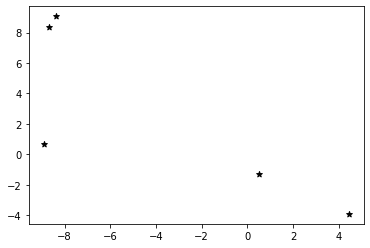

In [54]:
plotClusters(clusters)

(0,)
(1, 2)
(0,)
(0,)
(0,)


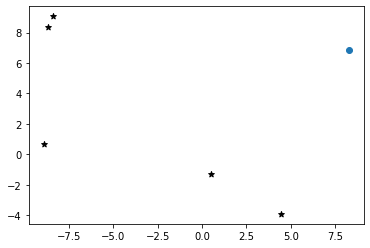

In [55]:
assignPointstoClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)